In [3]:
# import necessaries
%matplotlib inline

import pandas
import numpy
import math
import seaborn
import matplotlib
import matplotlib.pyplot
import functools
import operator
import string
import sklearn
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.pipeline
import sklearn.ensemble
import sklearn.decomposition
import sklearn.datasets
import sklearn.datasets.base

import statistics
import statsmodels
import statsmodels.discrete.discrete_model
import os

import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
import re


import keras
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

Using TensorFlow backend.
/Users/hollyjen123/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hollyjen123/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hollyjen123/opt/anaconda3/envs/ai_academy_3_7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np

In [7]:
from sklearn.model_selection import train_test_split
from numpy.random import RandomState

# Load training data
raw_data = pandas.read_csv('~/Desktop/training_data.csv', usecols = ['Text','Sentiment'])
raw_data = raw_data.rename(columns={"Text": "data", "Sentiment": "target"})

# filtering noise words such as word start with @, quotes, special characters
raw_data.data = [x.replace('&gt;', ' ').replace('&amp;', ' ').replace('&lt;',' ').replace('&quot;',' ') for x in raw_data.data]
raw_data.data = [' '.join(word for word in x.split() if word[0]!='@') for x in raw_data.data]

In [8]:
train_data = sklearn.datasets.base.Bunch(data=raw_data.data, target=raw_data.target)
train_text = train_data.data

In [9]:
# Load contestant file

contest_raw_data = pandas.read_csv('~/Desktop/contestant_judgment.csv', usecols = ['User','Text'])
contest_raw_data = contest_raw_data.rename(columns={"Text": "data"})
contest_data = contest_raw_data.copy()

# filtering noise words such as word start with @, quotes, special characters
contest_data.data = [x.replace('&gt;', ' ').replace('&amp;', ' ').replace('&lt;',' ').replace('&quot;',' ') for x in contest_data.data]
contest_data.data = [' '.join(word for word in x.split() if word[0]!='@') for x in contest_data.data]

contest = sklearn.datasets.base.Bunch(data=contest_data.data)

contest_text = contest.data

## Training a classifier

In [11]:
# tokenizer
# setting up the tokenizer
tok = keras.preprocessing.text.Tokenizer(num_words=10000)
tok.fit_on_texts(train_text)

max_len = 300

# text to sequence
train_data.data = tok.texts_to_sequences(train_text)
train_data.data = keras.preprocessing.sequence.pad_sequences(train_data.data, maxlen=max_len, 
                                                             padding="post", truncating="post")
train_data.data = train_data.data.astype(float)
train_data.target = numpy.asarray(train_data.target, dtype=float)

In [13]:
# text to sequence
contest.data = tok.texts_to_sequences(contest_text)
contest.data = keras.preprocessing.sequence.pad_sequences(contest.data, maxlen=max_len, 
                                                             padding="post", truncating="post")
contest.data = contest.data.astype(float)

In [14]:
# creating a sequential model + setting the layers
model = Sequential()
model.add(Embedding(10000, 8, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 8)            80000     
_________________________________________________________________
flatten (Flatten)            (None, 2400)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2401      
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


In [15]:
# training the model with the training data split 
history = model.fit(train_data.data, train_data.target, epochs=20,
                    batch_size=32, validation_split=0.2)

Train on 800000 samples, validate on 200000 samples
Epoch 1/20
800000/800000 [==============================] - 46s 58us/sample - loss: 0.4880 - acc: 0.7758 - val_loss: 0.4746 - val_acc: 0.7868
Epoch 2/20
800000/800000 [==============================] - 41s 52us/sample - loss: 0.4711 - acc: 0.7886 - val_loss: 0.4719 - val_acc: 0.7877
Epoch 3/20
800000/800000 [==============================] - 44s 54us/sample - loss: 0.4688 - acc: 0.7899 - val_loss: 0.4735 - val_acc: 0.7872
Epoch 4/20
800000/800000 [==============================] - 42s 52us/sample - loss: 0.4671 - acc: 0.7908 - val_loss: 0.4740 - val_acc: 0.7846
Epoch 5/20
800000/800000 [==============================] - 45s 57us/sample - loss: 0.4657 - acc: 0.7925 - val_loss: 0.4736 - val_acc: 0.7872
Epoch 6/20
800000/800000 [==============================] - 45s 56us/sample - loss: 0.4644 - acc: 0.7926 - val_loss: 0.4750 - val_acc: 0.7842
Epoch 7/20
800000/800000 [==============================] - 50s 63us/sample - loss: 0.4637 - acc

In [16]:
preds_train = pandas.DataFrame(model.predict_proba(train_data.data))
preds_train.columns = ["prediction"]
preds_train["actual"] = train_data.target

In [18]:
import wvpy.util

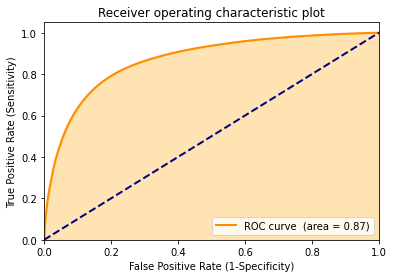

0.8684868321840001

In [19]:
# output graph and evaluate accurcay based on predicted and actual
wvpy.util.plot_roc(preds_train["prediction"], preds_train["actual"])

In [25]:
# if predicted value is greater than 40, label it as 1 else 0
max_value = 0;
max_i = 0;
i = 40
while i < 100:
    preds_train['result'] = preds_train['prediction'].apply(lambda x: 1.0 if float(x)*100 >= i else 0.0)
    comparison_column = np.where(preds_train["actual"] == preds_train["result"], True, False)
    # checking total true values
    if np.sum(comparison_column == True) > max_value: 
        max_value = np.sum(comparison_column == True) 
        max_i = i
    i += 1

(max_value, max_i)

(795750, 52)

In [26]:
# probability 52 --> accuracy is about 79%
(max_value/1000000)

0.79575

# Generate content result file

In [39]:
# creating the submitting csv
preds_contest = pandas.DataFrame(model.predict_proba(contest.data))
preds_contest.columns = ["prediction"]

In [44]:
preds_contest['result'] = preds_contest['prediction'].apply(lambda x: 1 if float(x)*100 >= 52 else 0)

In [45]:
contest_raw_data

,User,data,result,prediction
0,sauce_pot,I'm on my way to miss kacy's 4th bday party at...,0,0.300651
1,lovelyritaz,@ripestapple I might not be the right person ...,0,0.372301
2,Dannymassacur,@zomgkris I know it is.,0,0.479286
3,Ms_Lady09,Mii ViSioN is BLuRRy...iM goiN to Bed!!NiTe Ni...,0,0.470539
4,EvilSue,@tealou anyways - i did something good for som...,0,0.371077
...,...,...,...,...
599994,airsoft_gunner,is waiting to go to work,0,0.259179
599995,mlynnfrank,For 4 years i've been only an hour from syracu...,0,0.116495
599996,xxAnnaSxx,@SBWinner oh I'm sry for u two years ago we h...,1,0.791089
599997,Kiddylicious,@amy_beee he can`t think of a reason how you l...,0,0.333431


In [49]:
# drop unneccesary columns
contest_raw_data['result'] = preds_contest.result
result = contest_raw_data.drop(["User", "data", "prediction"], axis=1)

In [51]:
# store results into this csv
result.to_csv('~/Desktop/contestant_judgment_result.csv' )